In [1]:
import numpy as np


# define the burpee time needed to achieve a set number of rounds
def tb_time(tw, n, Tc):
    return 2*(Tc - n*tw) / (n**2 + n)


# define the total time equation
def tot_time(tw, tb, n):
    return n * tw + (n + 1)/2 * n*tb


# define the rounds equation
def rounds(tw, tb, Tc):
    a = tb/2
    b = tw + tb/2
    c = -Tc
    n = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    return n

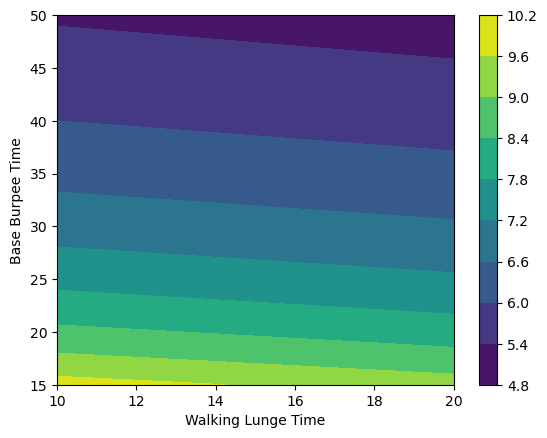

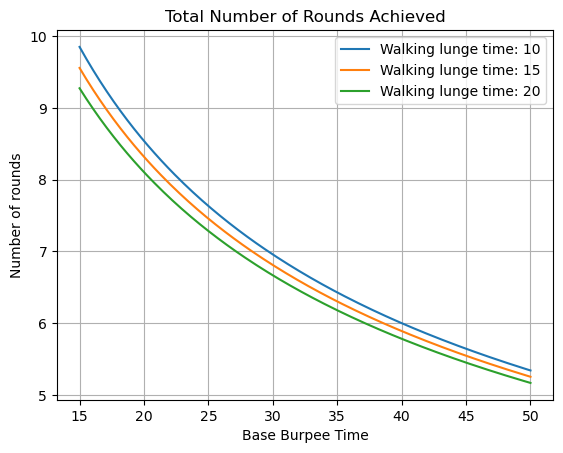

Targeting 4 rounds, by-round targets are: ['1:39', '4:42', '9:09', '15:00']
Targeting 5 rounds, by-round targets are: ['1:10', '3:15', '6:15', '10:10', '15:00']
Targeting 6 rounds, by-round targets are: ['0:54', '2:26', '4:36', '7:26', '10:54', '15:00']
Targeting 7 rounds, by-round targets are: ['0:43', '1:55', '3:35', '5:44', '8:21', '11:26', '15:00']
Targeting 8 rounds, by-round targets are: ['0:37', '1:35', '2:55', '4:37', '6:40', '9:05', '11:52', '15:00']
Targeting 9 rounds, by-round targets are: ['0:32', '1:21', '2:27', '3:50', '5:30', '7:27', '9:41', '12:12', '15:00']


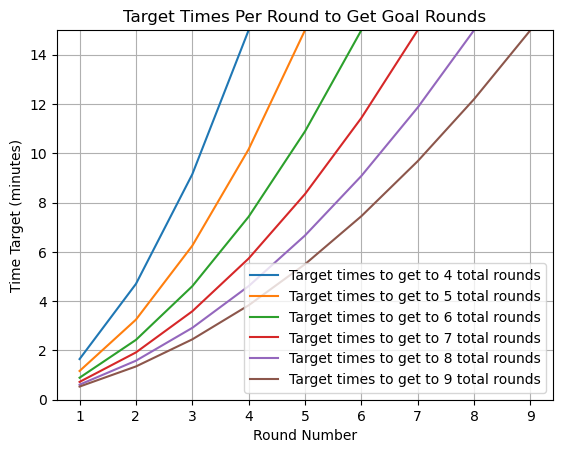

In [6]:
import matplotlib.pyplot as plt


# run rounds over a meshgrid
tw = np.linspace(10, 20, num=200)
tb = np.linspace(15, 50, num=200)
Tc = 60 * 15
TW, TB = np.meshgrid(tw, tb, sparse=True)
n_rounds = rounds(TW, TB, Tc)
h = plt.contourf(tw, tb, n_rounds)
plt.xlabel("Walking Lunge Time")
plt.ylabel("Base Burpee Time")
plt.colorbar()
plt.show()


# show a slice with constant walking lunges
fig, ax = plt.subplots(1, 1)
for tw_i in [10, 15, 20]:
    n_rounds_i = rounds(tw_i, tb, Tc)
    ax.plot(tb, n_rounds_i, label=f"Walking lunge time: {tw_i}")
plt.xlabel("Base Burpee Time")
plt.ylabel("Number of rounds")
plt.grid()
plt.title("Total Number of Rounds Achieved")
plt.legend()
plt.show()


# show time targets for different numbers of rounds
rounds_target = np.arange(4, 10, 1)
tw_target = 15
fig, ax = plt.subplots(1, 1)
for r_i in rounds_target:
    r_inter = np.arange(1, r_i+1)
    tb_target = tb_time(tw_target, r_i, Tc)
    t_by_r_target = tot_time(tw_target, tb_target, r_inter) / 60

    # print for rounds
    t_strings = [f"{int(t)}:{(t - int(t))*60:02.0f}" for t in t_by_r_target]
    print(f"Targeting {r_i} rounds, by-round targets are: {t_strings}")

    # add to plot
    ax.plot(r_inter, t_by_r_target, label=f"Target times to get to {r_i} total rounds")
plt.legend()
plt.ylim([0, Tc/60])
plt.grid()
plt.xlabel("Round Number")
plt.ylabel("Time Target (minutes)")
plt.title("Target Times Per Round to Get Goal Rounds")
plt.show()